# Fish AI

Real time fish counter and identification

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cv2
from darkflow.net.build import TFNet

# %config InlineBackend.figure_format = 'svg'

In [44]:
options = {
    'model': 'cfg/tiny-yolo-voc-3c.cfg',
#     'load': 'bin/tiny-yolo-voc.weights',
    'load': 1100,
    'thresh': 0.2,
    'gpu': 0
}

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-3c.cfg
Loading None ...
Finished in 7.843971252441406e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13,

In [49]:
!ls test/images/fish_vid_03*.jpg

test/images/fish_vid_03_0350.jpg  test/images/fish_vid_03_0407.jpg
test/images/fish_vid_03_0351.jpg  test/images/fish_vid_03_0408.jpg
test/images/fish_vid_03_0352.jpg  test/images/fish_vid_03_0409.jpg
test/images/fish_vid_03_0353.jpg  test/images/fish_vid_03_0410.jpg
test/images/fish_vid_03_0354.jpg  test/images/fish_vid_03_0411.jpg
test/images/fish_vid_03_0355.jpg  test/images/fish_vid_03_0412.jpg
test/images/fish_vid_03_0356.jpg  test/images/fish_vid_03_0413.jpg
test/images/fish_vid_03_0357.jpg  test/images/fish_vid_03_0414.jpg
test/images/fish_vid_03_0358.jpg  test/images/fish_vid_03_0415.jpg
test/images/fish_vid_03_0359.jpg  test/images/fish_vid_03_0416.jpg
test/images/fish_vid_03_0360.jpg  test/images/fish_vid_03_0417.jpg
test/images/fish_vid_03_0361.jpg  test/images/fish_vid_03_0418.jpg
test/images/fish_vid_03_0362.jpg  test/images/fish_vid_03_0419.jpg
test/images/fish_vid_03_0363.jpg  test/images/fish_vid_03_0420.jpg
test/images/fish_vid_03_0364.jpg  test/images/fish_vid_03_0421

[{'label': 'damselfish',
  'confidence': 0.5782356,
  'topleft': {'x': 338, 'y': 88},
  'bottomright': {'x': 426, 'y': 187}},
 {'label': 'damselfish',
  'confidence': 0.5345899,
  'topleft': {'x': 298, 'y': 85},
  'bottomright': {'x': 386, 'y': 155}},
 {'label': 'damselfish',
  'confidence': 0.6019573,
  'topleft': {'x': 491, 'y': 85},
  'bottomright': {'x': 589, 'y': 164}},
 {'label': 'damselfish',
  'confidence': 0.7007501,
  'topleft': {'x': 303, 'y': 167},
  'bottomright': {'x': 429, 'y': 251}},
 {'label': 'damselfish',
  'confidence': 0.59177923,
  'topleft': {'x': 196, 'y': 346},
  'bottomright': {'x': 317, 'y': 412}},
 {'label': 'damselfish',
  'confidence': 0.5706481,
  'topleft': {'x': 616, 'y': 486},
  'bottomright': {'x': 735, 'y': 570}},
 {'label': 'blue tang surgeonfish',
  'confidence': 0.7305662,
  'topleft': {'x': 1178, 'y': 420},
  'bottomright': {'x': 1305, 'y': 525}}]

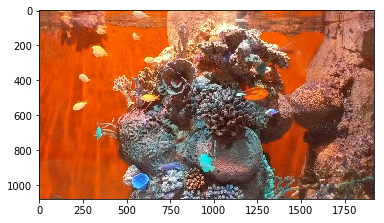

In [50]:
img = cv2.imread('test/images/fish_vid_03_0360.jpg', cv2.IMREAD_COLOR)
plt.imshow(img)
result = tfnet.return_predict(img)
result

In [51]:
# tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
# br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
# label = result[0]['label']

# tl, br, label

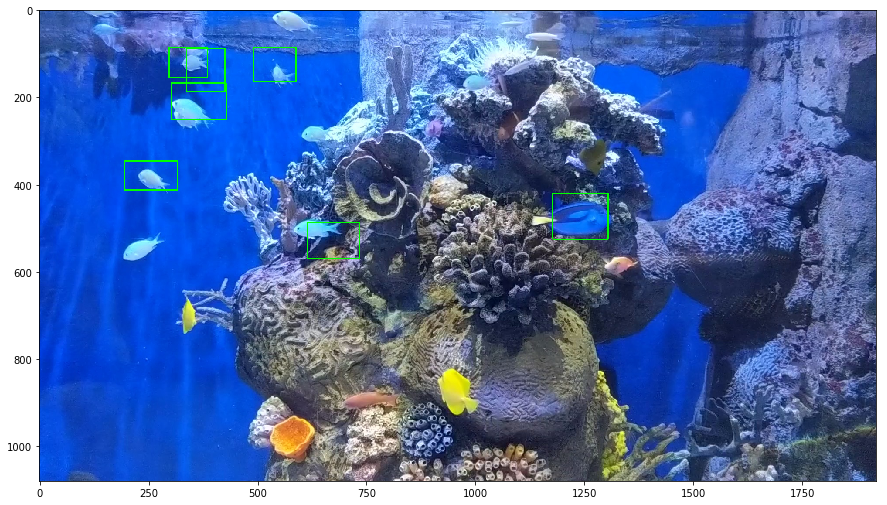

In [52]:
img2 = img

for i in range(len(result)):
    tl = (result[i]['topleft']['x'], result[i]['topleft']['y'])
    br = (result[i]['bottomright']['x'], result[i]['bottomright']['y'])
    label = result[i]['label']
    
    img2 = cv2.rectangle(img2, tl, br, (0, 255, 0), 2)
    
#     img2 = cv2.putText(img2, label, tl, fontFace = cv2.FONT_HERSHEY_COMPLEX, 
#                    fontScale = 0.1, color = (0, 255, 0), thickness=8)

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(img2)
plt.show()